<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span><ul class="toc-item"><li><span><a href="#Bernoulli's-Distribution" data-toc-modified-id="Bernoulli's-Distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli's Distribution</a></span></li><li><span><a href="#Binomial-Distribution" data-toc-modified-id="Binomial-Distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Binomial Distribution</a></span></li><li><span><a href="#Hypergeometric-Distribution-(BONUS)" data-toc-modified-id="Hypergeometric-Distribution-(BONUS)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hypergeometric Distribution (BONUS)</a></span></li><li><span><a href="#Poisson-Distribution" data-toc-modified-id="Poisson-Distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Poisson Distribution</a></span></li></ul></li></ul></div>

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [1]:
"""
Calculate:
p = probability that the fruit is an apple = 60/100 
q = probability that the fruit is an orange = 40/100
"""



'\nCalculate:\np = probability that the fruit is an apple = 60/100 \nq = probability that the fruit is an orange = 40/100\n'

In [2]:
p = 60/100 
p

0.6

In [3]:
q = 40/100
q

0.4

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is placed in the basket. Therefore, every time we are taking 1 fruit from< the same 100 fruits (sample with replacements). - that means that the amount is always the same, so same probabilities for each time are the same

1. **What is the probability that the first 5 fruits are all apples?**

pˆ5 = (60/100)ˆ5 

2. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

pˆ5*qˆ15



You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
#1. **What is the probability that the first 5 fruits are all apples?**

# p = probability that the fruit is an apple = 60/100ˆ5 

(p)**5 

0.07775999999999998

In [5]:
#2. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

#pˆ5*qˆ15

(p**5)*(q**15)

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits (sample with replacements).

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [9]:
from scipy.stats import binom
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html?highlight=binom#scipy.stats.binom

# binom takes n and p as shape parameters, 
#where p is the probability of a single success and (1-p) is the probability of a single failure.

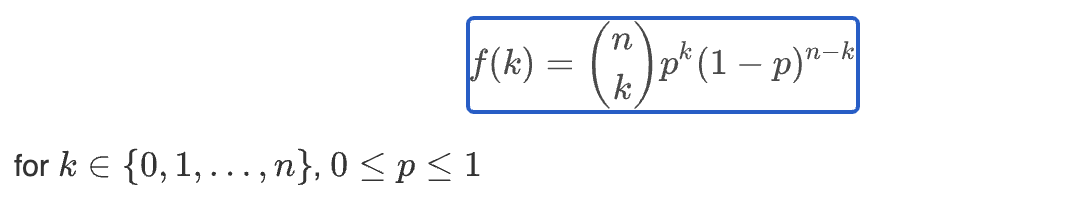

In [12]:
# The probability mass function above is defined in the “standardized” form.
#To shift distribution use the loc parameter. Specifically, binom.pmf(k, n, p, loc) is
#identically equivalent to binom.pmf(k - loc, n, p).
#pmf(k, n, p, loc=0)
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
#Display the probability mass function
#we consider apple as success
p_a = 60/100
n = 20
k_a= 5 
#stats.binom.pmf(k,n,p)

binom.pmf(k_a,n,p_a)

0.0012944935222876511

In the lesson we also discussed CDF (cumulative distribution function). In Python, this can be calculated with the ```binom()``` function. Read the documentation in order to learn how to use it.


In the context of the above problem, **what is the probability that from the 20 selected fruits, less than 5 fruits picked are apples?** CDF, cumulative distribution

Write the formula and calculate the probability below.

In [14]:
#prob = binom.cdf(x, n, p) n repetitions, x successes, probaility of success (p above)

binom.cdf(4, n, p_a)

0.0003170311211686301

***Optional self learning: We will see matplotlib tomorrow.***

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [17]:
# setting the values
# of n and p
n = n
p = p_a

In [18]:
# defining the list of range values of x
r_values = list(range(n + 1))

In [20]:
# obtaining the mean and variance 
mean, var = binom.stats(n, p)
mean,var

(array(12.), array(4.8))

In [21]:
# list of pmf values for each x
dist = [binom.pmf(r, n, p) for r in r_values ]

In [22]:
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

r	p(r)
0	1.099511627776003e-08
1	3.298534883327999e-07
2	4.7004122087424025e-06
3	4.230370987868157e-05
4	0.0002696861504765946
5	0.0012944935222876511
6	0.004854350708578698
7	0.014563052125736161
8	0.035497439556481845
9	0.07099487911296357
10	0.11714155053639011
11	0.15973847800416796
12	0.17970578775468918
13	0.16588226561971353
14	0.1244116992147844
15	0.07464701952887058
16	0.034990790404158166
17	0.012349690730879373
18	0.0030874226827198427
19	0.00048748779200839646
20	3.656158440062977e-05
mean = 12.0
variance = 4.800000000000001


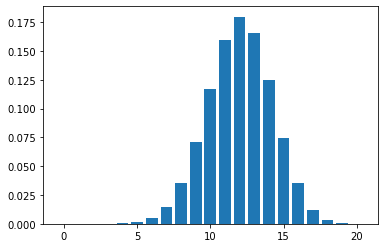

In [27]:
import matplotlib.pyplot as plt

plt.bar(r_values, dist)
plt.show()

#if the probability of success will be 0.5 it will look like a normal distribution

## Hypergeometric Distribution (BONUS) 

Similar to the above problem, this time again we randomly sample 20 fruits, but this time we don't add any more fruits after selecting a fruit (sample without replacements).

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [29]:
from scipy.stats import hypergeom
#The hypergeometric distribution models drawing objects from a bin. 
#M is the total number of objects, n is total number of Type I objects. 
#The random variate represents the number of Type I objects in N drawn without replacement from 
#the total population.


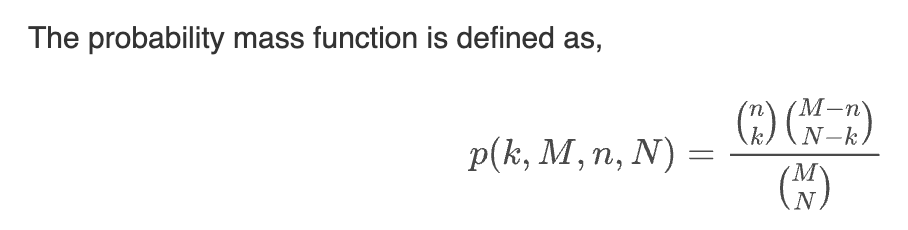

In [30]:
#hypergeom(M, n, N)
hypergeom(100, 60, 20)

In [31]:
#the distribution
hypergeom(100, 60, 20).pmf(5)

0.00040988436742350564

In [33]:
#pmf(k, M, n, N)
hypergeom.pmf(5,100, 60, 20)


0.00040988436742350564

In the lesson we also discussed CDF (cumulative distribution function). In Python, this can be calculated with the hypergeom() function. Read the documentation in order to learn how to use it.

In the context of the above problem, what is the probability that from the 20 selected fruits, less than 5 fruits picked are apples?

Write the formula and calculate the probability below.

In [34]:
hypergeom(100, 60, 20).cdf(4)

6.323704487233781e-05

## Poisson Distribution

In this challenge you are required to use the Math library in Python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [37]:
from scipy.stats import poisson
#poisson.stats(mu)
#poisson.pmf(k, mu, loc)
poisson.pmf(5,2.3)

0.053775025581946814

In [45]:
import math
import numpy as np
mu= 2.3
k= 5

#pmf(k)=exp(-mu)*(mu^k/k!) = (e^(-mu)*mu^k)/k!
#numpy.exp--for e or math.e

In [50]:
math.factorial(k)

120

In [52]:
# your code here 

pmf_k = (np.exp(-mu)*mu**k)/math.factorial(k)


print(f"the probability that the number of goals scored in a match is 5 is: {pmf_k}")

the probability that the number of goals scored in a match is 5 is: 0.0537750255819468


***Optional self learning: We will see matplotlib tomorrow.***


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [56]:
r_values = list(range(0,11,1))
r_values 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [60]:
dist = [poisson.pmf(r, mu) for r in r_values ]
dist

[0.10025884372280375,
 0.23059534056244857,
 0.2651846416468159,
 0.20330822526255884,
 0.11690222952597128,
 0.053775025581946814,
 0.020613759806412932,
 0.00677309250782139,
 0.0019472640959986487,
 0.0004976341578663217,
 0.00011445585630925406]

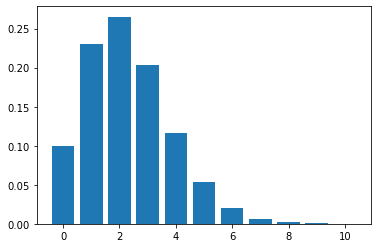

In [61]:
plt.bar(r_values, dist)
plt.show()